In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [9]:
df=pd.DataFrame({'m_id':[1,2,3,4,5],
            'm_gen':['rock','rock','pop','disco','pop']},
            columns=['m_id', 'm_gen'])

In [10]:
df

,m_id,m_gen
0,1,rock
1,2,rock
2,3,pop
3,4,disco
4,5,pop


In [13]:
mm=pd.get_dummies(df['m_gen'])
mm

,disco,pop,rock
0,0,0,1
1,0,0,1
2,0,1,0
3,1,0,0
4,0,1,0


In [14]:
mm=df.join(mm.add_prefix('genre_'))
mm

,m_id,m_gen,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,rock,0,0,1
2,3,pop,0,1,0
3,4,disco,1,0,0
4,5,pop,0,1,0


In [15]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [16]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

W0805 10:17:04.576836 18940 deprecation.py:323] From <ipython-input-16-0eda2f9c2d4a>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 10:17:04.577800 18940 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 10:17:04.581788 18940 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future versio

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 10:17:06.492429 18940 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 10:17:06.496419 18940 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0805 10:17:07.284312 18940 deprecation.py:323] From C:\Users\Kyujin\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
nb_classes=10 #분류결과의 종류 개수

In [21]:
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, nb_classes])
w=tf.Variable(tf.random_normal([28*28,nb_classes]))
b=tf.Variable(tf.random_normal([nb_classes]))
hf=tf.nn.softmax(tf.matmul(x,w)+b)# 확률로 나오게됨
cost= tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct=tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs=15
batch_size=100

Epoch:    1 cost: 2.866520623
Epoch:    2 cost: 1.119760057
Epoch:    3 cost: 0.882859233
Epoch:    4 cost: 0.769854614
Epoch:    5 cost: 0.699459195
Epoch:    6 cost: 0.649655825
Epoch:    7 cost: 0.614076235
Epoch:    8 cost: 0.582749436
Epoch:    9 cost: 0.559519561
Epoch:   10 cost: 0.539737570
Epoch:   11 cost: 0.522826339
Epoch:   12 cost: 0.506761948
Epoch:   13 cost: 0.494751411
Epoch:   14 cost: 0.482112837
Epoch:   15 cost: 0.472066114
0.8884
Label: [4]
Prediction: [9]


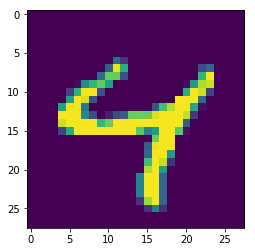

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):# 5만개의 이미지 15번 트레이닝
        total_batch=int(mnist.train.num_examples/ batch_size)
        avg_cost=0
        for i in range(total_batch): # 이미지를 500번 읽어들임
            batch_xs, batch_ys=mnist.train.next_batch(batch_size)
            cv, _=sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost+=cv/total_batch
        print("Epoch:",'%4d' %(epoch+1),
             'cost:', '{:.9f}'.format(avg_cost))
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    r=random.randint(0,mnist.test.num_examples-1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show

In [33]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [35]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))


In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}),sess.run(w))
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print( hv, pv, av)

0 0.8695313 [[ 0.5667879]
 [-1.1029787]]
100 0.71919835 [[ 0.04228214]
 [-0.89146864]]
200 0.70286244 [[-0.04299825]
 [-0.5455142 ]]
300 0.69692975 [[-0.06481583]
 [-0.33386502]]
400 0.6946827 [[-0.06281089]
 [-0.20664027]]
500 0.6937925 [[-0.05255967]
 [-0.12941235]]
600 0.69342566 [[-0.040898  ]
 [-0.08195676]]
700 0.6932696 [[-0.03049847]
 [-0.05243313]]
800 0.6932017 [[-0.02213034]
 [-0.03384824]]
900 0.6931716 [[-0.01576225]
 [-0.02202211]]
1000 0.6931582 [[-0.01107962]
 [-0.01442372]]
1100 0.6931522 [[-0.00771374]
 [-0.00950019]]
1200 0.69314945 [[-0.00533222]
 [-0.00628657]]
1300 0.6931482 [[-0.00366621]
 [-0.00417606]]
1400 0.69314766 [[-0.00251045]
 [-0.0027828 ]]
1500 0.69314736 [[-0.00171363]
 [-0.00185912]]
1600 0.6931473 [[-0.00116688]
 [-0.0012446 ]]
1700 0.69314724 [[-0.00079308]
 [-0.0008346 ]]
1800 0.6931472 [[-0.00053822]
 [-0.0005604 ]]
1900 0.6931471 [[-0.00036482]
 [-0.00037667]]
2000 0.6931472 [[-0.00024709]
 [-0.00025343]]
2100 0.6931472 [[-0.00016723]
 [-0.00017

In [40]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [50]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1)

w2=tf.Variable(tf.random_normal([10,1]))
b2=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L1,w2)+b2)


# hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print( hv, pv, av)
    print(sess.run(b1),'\n')
    print(sess.run(b2))

0 0.71467113
100 0.687394
200 0.67446417
300 0.65950346
400 0.64107376
500 0.61796033
600 0.5892305
700 0.5544181
800 0.51381534
900 0.46860707
1000 0.42073807
1100 0.37255424
1200 0.3263174
1300 0.28377494
1400 0.24594879
1500 0.21316928
1600 0.18525738
1700 0.16174014
1800 0.1420236
1900 0.12550646
2000 0.11163972
2100 0.099950284
2200 0.09004387
2300 0.0815983
2400 0.07435291
2500 0.068097875
2600 0.06266409
2700 0.05791554
2800 0.053741813
2900 0.050053455
3000 0.046777107
3100 0.043852583
3200 0.041230388
3300 0.03886906
3400 0.036734175
3500 0.03479671
3600 0.03303223
3700 0.03141987
3800 0.029941965
3900 0.028583262
4000 0.027330723
4100 0.026173078
4200 0.025100488
4300 0.024104292
4400 0.023177128
4500 0.022312371
4600 0.021504253
4700 0.020747531
4800 0.020037822
4900 0.019371007
5000 0.018743467
5100 0.018152026
5200 0.01759378
5300 0.01706611
5400 0.016566664
5500 0.016093357
5600 0.015644256
5700 0.015217638
5800 0.014811896
5900 0.014425631
6000 0.014057519
6100 0.0137063

In [48]:
#wide 하게 구성 0.006

In [49]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [52]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1)

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1,w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2,w3)+b3)

w4=tf.Variable(tf.random_normal([10,1]))
b4=tf.Variable(tf.random_normal([1]))
hf=tf.sigmoid(tf.matmul(L3,w4)+b4)


# hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print( hv, pv, av)
    print(sess.run(b1),'\n')
    print(sess.run(b2))

0 0.7944534
100 0.7002213
200 0.6947651
300 0.69040954
400 0.68639266
500 0.68218106
600 0.6772959
700 0.67121565
800 0.6633246
900 0.65290135
1000 0.63917106
1100 0.6214257
1200 0.5990598
1300 0.57150877
1400 0.53875947
1500 0.5007153
1600 0.45441052
1700 0.39512143
1800 0.32200766
1900 0.24362355
2000 0.17480865
2100 0.1238839
2200 0.08942616
2300 0.066635475
2400 0.05136199
2500 0.04083565
2600 0.03334629
2700 0.027851097
2800 0.023704786
2900 0.020498108
3000 0.017964037
3100 0.015923558
3200 0.014253232
3300 0.012866174
3400 0.011699662
3500 0.010707638
3600 0.00985546
3700 0.009117022
3800 0.0084719015
3900 0.007904264
4000 0.007401578
4100 0.0069537815
4200 0.006552684
4300 0.0061916322
4400 0.005865246
4500 0.0055688317
4600 0.005298647
4700 0.00505151
4800 0.0048246784
4900 0.004615893
5000 0.0044230768
5100 0.0042445743
5200 0.0040788967
5300 0.003924736
5400 0.0037810244
5500 0.0036467565
5600 0.003521015
5700 0.0034031242
5800 0.0032922893
5900 0.0031879996
6000 0.003089654

In [ ]:
nb_classes=256 #분류결과의 종류 개수

In [75]:
xdata=[[0,0],[0,1],[1,0],[1,1]]
ydata=[[0],[1],[1],[0]]

In [76]:
x=tf.placeholder(tf.float32,[None,2])
y=tf.placeholder(tf.float32,[None,1])

w1=tf.Variable(tf.random_normal([2,10]))
b1=tf.Variable(tf.random_normal([10]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1)

w2=tf.Variable(tf.random_normal([10,10]))
b2=tf.Variable(tf.random_normal([10]))
L2=tf.sigmoid(tf.matmul(L1,w2)+b2)

w3=tf.Variable(tf.random_normal([10,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.sigmoid(tf.matmul(L2,w3)+b3)

w4=tf.Variable(tf.random_normal([10,10]))
b4=tf.Variable(tf.random_normal([10]))
L4=tf.sigmoid(tf.matmul(L3,w4)+b4)

w5=tf.Variable(tf.random_normal([10,10]))
b5=tf.Variable(tf.random_normal([1]))
hf=tf.nn.softmax(tf.matmul(L4,w5)+b5)

# w6=tf.Variable(tf.random_normal([10,10]))
# b6=tf.Variable(tf.random_normal([10]))
# hf=tf.sigmoid(tf.matmul(L5,w6)+b6)

# w7=tf.Variable(tf.random_normal([10,10]))
# b7=tf.Variable(tf.random_normal([10]))
# hf=tf.sigmoid(tf.matmul(L6,w7)+b7)

# w8=tf.Variable(tf.random_normal([10,10]))
# b8=tf.Variable(tf.random_normal([10]))
# L8=tf.sigmoid(tf.matmul(L7,w8)+b8)

# w9=tf.Variable(tf.random_normal([10,10]))
# b9=tf.Variable(tf.random_normal([10]))
# L9=tf.sigmoid(tf.matmul(L8,w9)+b9)

# w10=tf.Variable(tf.random_normal([10,1]))
# b10=tf.Variable(tf.random_normal([1]))
# hf=tf.sigmoid(tf.matmul(L9,w10)+b10)



# hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
predicted= tf.cast(hf>0.5, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [79]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={x:xdata, y:ydata})
        if step % 100==0:
            print(step, sess.run(cost, feed_dict={x:xdata, y:ydata}))
    hv,pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print('hv:', hv, 'pv:',pv, 'av:',av)
    print(sess.run(b1),'\n')
    print(sess.run(b2))


0 0.8662399
100 0.7153983
200 0.6987957
300 0.6943469
400 0.69295025
500 0.6924388
600 0.6921898
700 0.69201744
800 0.69186515
900 0.6917149
1000 0.69156045
1100 0.6913993
1200 0.6912297
1300 0.6910503
1400 0.6908595
1500 0.69065607
1600 0.69043803
1700 0.69020355
1800 0.68995064
1900 0.6896767
2000 0.68937904
2100 0.68905425
2200 0.68869877
2300 0.6883081
2400 0.68787736
2500 0.68740046
2600 0.6868701
2700 0.68627787
2800 0.6856138
2900 0.68486553
3000 0.68401825
3100 0.68305385
3200 0.6819503
3300 0.68068033
3400 0.67921025
3500 0.67749846
3600 0.6754936
3700 0.67313296
3800 0.67034054
3900 0.6670265
4000 0.6630869
4100 0.6584048
4200 0.6528553
4300 0.64631647
4400 0.63869274
4500 0.62995374
4600 0.62018156
4700 0.60960567
4800 0.5985934
4900 0.5875829
5000 0.5769851
5100 0.5671065
5200 0.5581194
5300 0.5500786
5400 0.5429567
5500 0.53667915
5600 0.53115076
5700 0.5262716
5800 0.5219457
5900 0.518085
6000 0.5146096
6100 0.5114466
6200 0.5085281
6300 0.5057871
6400 0.5031529
6500 0.50

In [122]:
nb_classes=256 #분류결과의 종류 개수

In [132]:
x=tf.placeholder(tf.float32, [None, 28*28])
y=tf.placeholder(tf.float32, [None, 10])

w1=tf.Variable(tf.random_normal([28*28,nb_classes]))
b1=tf.Variable(tf.random_normal([nb_classes]))
L1=tf.sigmoid(tf.matmul(x,w1)+b1)# 확률로 나오게됨

w2=tf.Variable(tf.random_normal([nb_classes,nb_classes]))
b2=tf.Variable(tf.random_normal([nb_classes]))
L2=tf.sigmoid(tf.matmul(L1,w2)+b2)# 확률로 나오게됨

w3=tf.Variable(tf.random_normal([nb_classes,nb_classes]))
b3=tf.Variable(tf.random_normal([nb_classes]))
L3=tf.sigmoid(tf.matmul(L2,w3)+b3)# 확률로 나오게됨

w4=tf.Variable(tf.random_normal([nb_classes,10]))
b4=tf.Variable(tf.random_normal([10]))
hf=tf.nn.softmax(tf.matmul(L3,w4)+b4)# 확률로 나오게됨



cost= tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)
is_correct=tf.equal(tf.arg_max(hf,1), tf.arg_max(y,1))
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

training_epochs=15
batch_size=10

Epoch:    1 cost: 0.790261891
Epoch:    2 cost: 0.372007068
Epoch:    3 cost: 0.274105458
Epoch:    4 cost: 0.211594547
Epoch:    5 cost: 0.168877656
Epoch:    6 cost: 0.134589994
Epoch:    7 cost: 0.111151297
Epoch:    8 cost: 0.086749782
Epoch:    9 cost: 0.071148269
Epoch:   10 cost: 0.058703258
Epoch:   11 cost: 0.044178819
Epoch:   12 cost: 0.038174790
Epoch:   13 cost: 0.028933481
Epoch:   14 cost: 0.024219918
Epoch:   15 cost: 0.018789374
0.9429
Label: [1]
Prediction: [1]


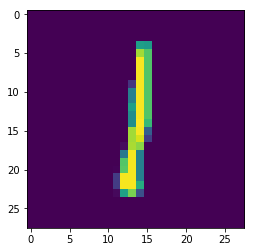

In [133]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):# 5만개의 이미지 15번 트레이닝
        total_batch=int(mnist.train.num_examples/ batch_size)
        avg_cost=0
        for i in range(total_batch): # 이미지를 500번 읽어들임
            batch_xs, batch_ys=mnist.train.next_batch(batch_size)
            cv, _=sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
            avg_cost+=cv/total_batch
        print("Epoch:",'%4d' %(epoch+1),
             'cost:', '{:.9f}'.format(avg_cost))
    print(sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    r=random.randint(0,mnist.test.num_examples-1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28))
    plt.show